In [22]:
import pandas as pd

In [23]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [24]:
# 절반 이상이 NaN인 데이터 column 드롭
drop_col = train.loc[:,(train.isna().sum(axis=0)>=len(train)/2).values].columns
train.drop(columns = drop_col,inplace = True)
train

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,114.612,19.9,7,127,1,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.600,7.0,185,1,0,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,19.8,10,73,1,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,19.900,12.0,268,1,0,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.700,8.0,121,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.200,1.0,318,1,0,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,20.5,14,197,1,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,85.000,19.7,1,27,1,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,20.100,13.0,117,1,0,Normal


In [25]:
train.value_counts()

Wip Line_Dam  Process Desc._Dam  Equipment_Dam     Model.Suffix_Dam  Workorder_Dam  Insp. Seq No._Dam  Insp Judge Code_Dam  CURE END POSITION X Collect Result_Dam  CURE END POSITION Z Collect Result_Dam  CURE END POSITION Θ Collect Result_Dam  CURE SPEED Collect Result_Dam  CURE STANDBY POSITION X Collect Result_Dam  CURE STANDBY POSITION Z Collect Result_Dam  CURE STANDBY POSITION Θ Collect Result_Dam  CURE START POSITION X Collect Result_Dam  CURE START POSITION Z Collect Result_Dam  CURE START POSITION Θ Collect Result_Dam  DISCHARGED SPEED OF RESIN Collect Result_Dam  DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  Dispense Volume(Stage1) Collect Result_Dam  Dispense Volume(Stage2) Collect Result_Dam  Dispense Volume(Stage3) Collect Result_Dam  HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam  HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam  HEAD NORMAL CO

In [26]:
# 전부 다 다른 column과 전부 다 같은 column도 드롭
print(len(train.columns[(train.nunique()==1)|(train.nunique()==len(train))]))
train.drop(columns=train.columns[(train.nunique()==1)|(train.nunique()==len(train))],inplace=True)

35


In [27]:
train_fill_col = train.columns[train.isna().sum(axis=0)>0]
train_fill_col

Index(['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'],
      dtype='object')

In [28]:
no_agreement_col_list = train.columns[(train.applymap(lambda x: type(x).__name__).nunique()>1).values]
no_agreement_col_list

Index(['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'],
      dtype='object')

In [29]:
condition = (train.loc[:,no_agreement_col_list] != 'OK')

In [30]:
replace_list = []
replace_list.append(train.loc[condition.iloc[:,0],no_agreement_col_list[0]].dropna().astype('float').mean())
replace_list.append(train.loc[condition.iloc[:,0],no_agreement_col_list[0]].dropna().astype('float').mean())
replace_list.append(train.loc[condition.iloc[:,0],no_agreement_col_list[0]].dropna().astype('float').mean())

In [31]:
train.loc[:,no_agreement_col_list[0]] = train.loc[:,no_agreement_col_list[0]].replace({'OK':replace_list[0]})
train.loc[:,no_agreement_col_list[1]] = train.loc[:,no_agreement_col_list[1]].replace({'OK':replace_list[1]})
train.loc[:,no_agreement_col_list[2]] = train.loc[:,no_agreement_col_list[2]].replace({'OK':replace_list[2]})

In [32]:
# 결측치 평균으로 제거
train.loc[:,no_agreement_col_list[0]].fillna(replace_list[0],inplace=True)
train.loc[:,no_agreement_col_list[1]].fillna(replace_list[1],inplace=True)
train.loc[:,no_agreement_col_list[2]].fillna(replace_list[2],inplace=True)

In [33]:
train.reset_index(inplace=True,drop=True)

In [58]:
A = train.loc[train['target']=='Normal','Workorder_Dam'].value_counts().values

In [59]:
B = train.loc[train['target']=='AbNormal','Workorder_Dam'].value_counts().values

In [60]:
len(A)

661

In [61]:
len(B)

519

In [62]:
import numpy as np
cnt = 0
for item in A:
    if item in B:
        cnt+=1
cnt

149

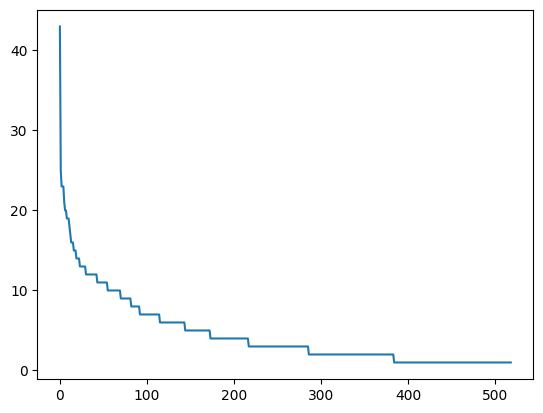

In [40]:
plt.plot(train.loc[train['target']=='AbNormal','Workorder_Dam'].value_counts().values)